# Inference

Based on the evaluation results I have decided to go with Faster R-CNN model as the accuracy is more. In this notebook, I run the model for inferencing on some images I downloaded from Google.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#  Object Detection From TF2 Saved Model

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)


# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

IMAGE_PATHS = '/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/'

## Set the path to the model


The path of the model and labelmap are set to

In [10]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [11]:
PATH_TO_MODEL_DIR = '/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model'.format(PATH_TO_MODEL)

In [12]:
print(PATH_TO_MODEL_DIR)

/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model


In [13]:
PATH_TO_LABELS = '/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/data/label_map.pbtxt'

Loading the saved model and built a detection function

In [14]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 5.5427916049957275 seconds


This line of code maps the class names from the pbtxt file with numerical form on which the model was trained. Neural networks are trained only on numerical values.

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download (2).jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download.jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download (3).jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download (1).jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download (4).jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/images.jpeg... Done
Running inference for /home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/test_images/download (5).jpeg... Done


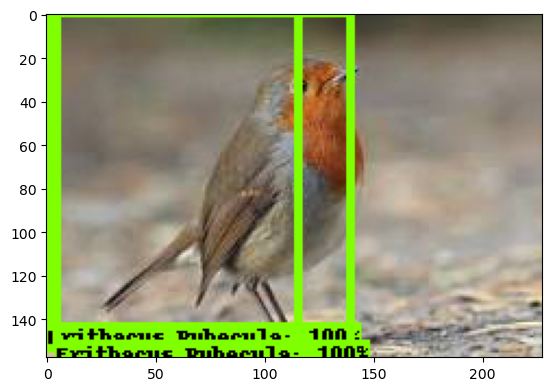

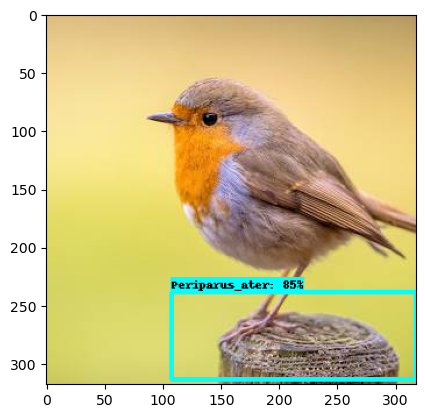

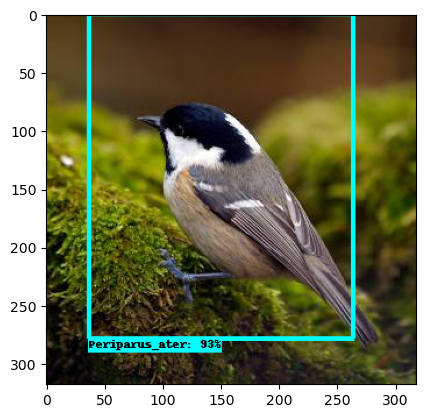

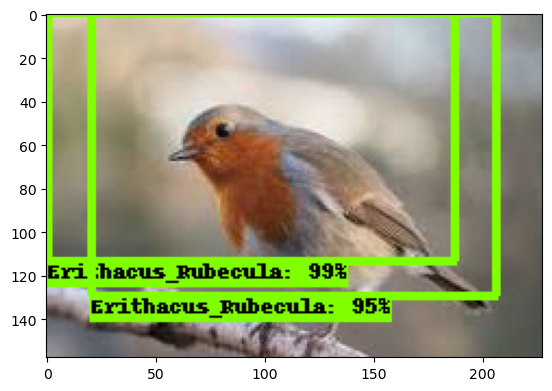

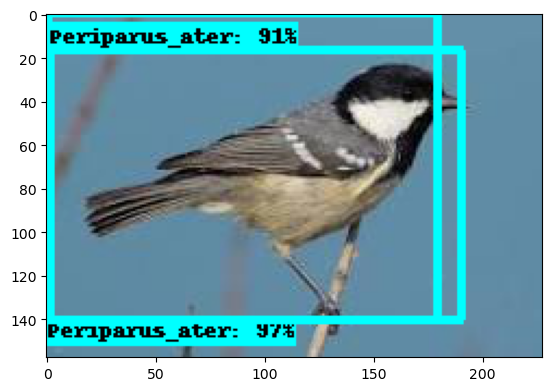

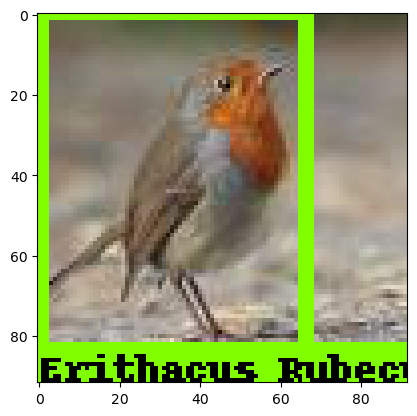

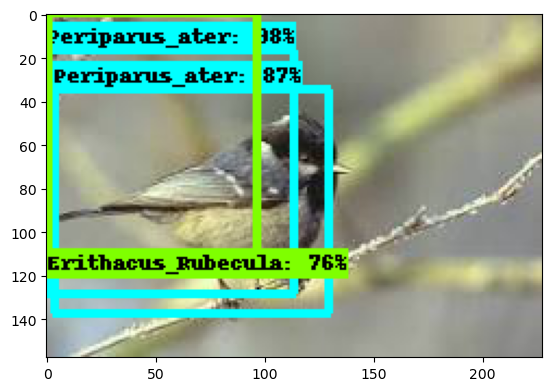

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# convert the image into numpy array
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


# loop through the test image directory and peform detection on each image
for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.75,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

The above detections are good and even the accuracy with which the model is detecting.